Hasil clustering:
      genre platform  frequency    reason       time  cluster
0   romance  Netflix          4     story      night        1
1    horror  YouTube          1       fun    weekend        0
2    comedy   Cinema          2     actor      night        0
3   romance  Disney+          3  language      night        2
4    horror  Netflix          5     story    weekend        1
5    comedy  YouTube          2       fun  afternoon        0
6   romance  Disney+          6     actor      night        1
7    horror   Cinema          1  language    weekend        0
8    comedy  Netflix          3     story      night        2
9   romance  Disney+          4     actor  afternoon        2
10  romance   Cinema          5  language    weekend        1
11   comedy  Netflix          2       fun      night        2
12   horror  YouTube          1     story    morning        0
13  romance  Netflix          7     actor      night        1
14   horror   Cinema          3  language    weekend

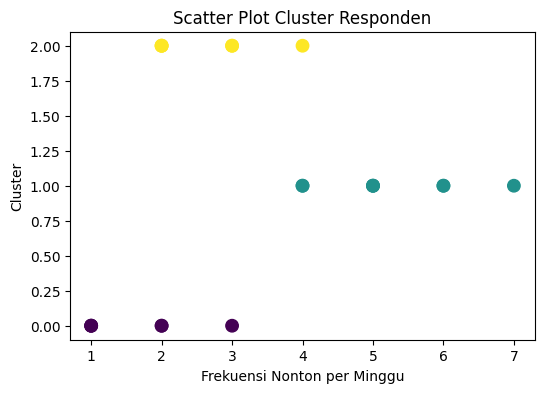

<Figure size 600x400 with 0 Axes>

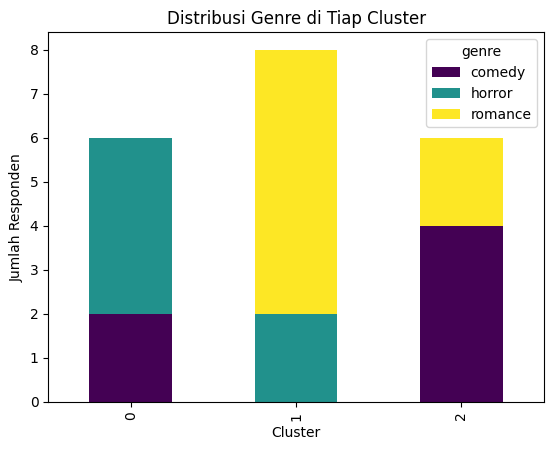

<Figure size 600x400 with 0 Axes>

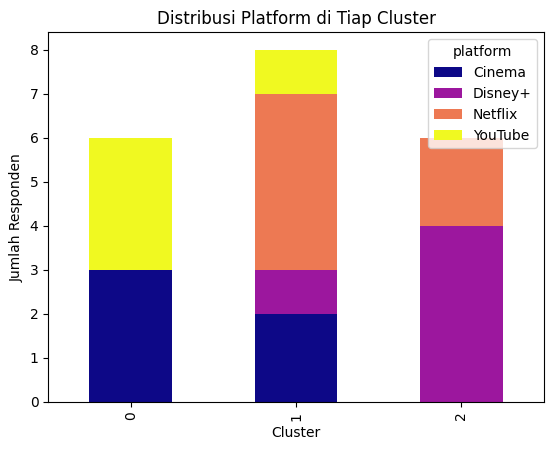

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# ==== Data Responden ====
data = pd.DataFrame({
    "genre": [
        "romance", "horror", "comedy", "romance", "horror",
        "comedy", "romance", "horror", "comedy", "romance",
        "romance", "comedy", "horror", "romance", "horror",
        "comedy", "romance", "horror", "comedy", "romance"
    ],
    "platform": [
        "Netflix", "YouTube", "Cinema", "Disney+", "Netflix",
        "YouTube", "Disney+", "Cinema", "Netflix", "Disney+",
        "Cinema", "Netflix", "YouTube", "Netflix", "Cinema",
        "Disney+", "YouTube", "Netflix", "Disney+", "Cinema"
    ],
    "frequency": [4, 1, 2, 3, 5, 2, 6, 1, 3, 4,
                  5, 2, 1, 7, 3, 2, 4, 6, 2, 5],
    "reason": [
        "story", "fun", "actor", "language", "story",
        "fun", "actor", "language", "story", "actor",
        "language", "fun", "story", "actor", "language",
        "story", "fun", "actor", "language", "story"
    ],
    "time": [
        "night", "weekend", "night", "night", "weekend",
        "afternoon", "night", "weekend", "night", "afternoon",
        "weekend", "night", "morning", "night", "weekend",
        "afternoon", "night", "weekend", "morning", "night"
    ]
})

# ==== Preprocessing ====
encoder = OneHotEncoder()
categorical = data[["genre", "platform", "reason", "time"]]
encoded = encoder.fit_transform(categorical).toarray()

# Gabungkan dengan frequency
X = np.hstack([encoded, data[["frequency"]].values])

# ==== Clustering ====
kmeans = KMeans(n_clusters=3, random_state=42)
data["cluster"] = kmeans.fit_predict(X)

print("Hasil clustering:")
print(data[["genre","platform","frequency","reason","time","cluster"]])

# ==== Visualisasi ====
# 1. Scatter plot (frekuensi vs cluster)
plt.figure(figsize=(6,4))
plt.scatter(data["frequency"], data["cluster"], c=data["cluster"], cmap="viridis", s=80)
plt.xlabel("Frekuensi Nonton per Minggu")
plt.ylabel("Cluster")
plt.title("Scatter Plot Cluster Responden")
plt.show()

# 2. Bar chart genre per cluster
plt.figure(figsize=(6,4))
pd.crosstab(data["cluster"], data["genre"]).plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Distribusi Genre di Tiap Cluster")
plt.ylabel("Jumlah Responden")
plt.xlabel("Cluster")
plt.show()

# 3. Bar chart platform per cluster
plt.figure(figsize=(6,4))
pd.crosstab(data["cluster"], data["platform"]).plot(kind="bar", stacked=True, colormap="plasma")
plt.title("Distribusi Platform di Tiap Cluster")
plt.ylabel("Jumlah Responden")
plt.xlabel("Cluster")
plt.show()
